In [ ]:
!pip install ipywidgets
import ipywidgets as widgets
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00


In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"senswagato","key":"9d85645a6eac91562aebe651df533c72"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:07<00:00, 37.3MB/s]
100% 572M/572M [00:07<00:00, 75.3MB/s]


In [ ]:
!unzip \*zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:
for dirpath,dirname,filename in os.walk("/content/COVID_IEEE"):
  print(f"There are {len(dirname)} directory and {len(filename)} image in '{dirpath}'.")

There are 3 directory and 0 image in '/content/COVID_IEEE'.
There are 0 directory and 536 image in '/content/COVID_IEEE/covid'.
There are 0 directory and 668 image in '/content/COVID_IEEE/normal'.
There are 0 directory and 619 image in '/content/COVID_IEEE/virus'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_name = np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:
    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:
    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(1)

In [ ]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:
    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) /255.0
img_labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=16, batch_size=32)

Epoch 1/16
32/32 [==============================] - 16s 313ms/step - loss: 0.3133 - accuracy: 0.8961 - val_loss: 0.2061 - val_accuracy: 0.9292
Epoch 2/16
32/32 [==============================] - 4s 141ms/step - loss: 0.2233 - accuracy: 0.9245 - val_loss: 0.1606 - val_accuracy: 0.9475
Epoch 3/16
32/32 [==============================] - 4s 135ms/step - loss: 0.2174 - accuracy: 0.9167 - val_loss: 0.1975 - val_accuracy: 0.9224
Epoch 4/16
32/32 [==============================] - 5s 143ms/step - loss: 0.1448 - accuracy: 0.9500 - val_loss: 0.1728 - val_accuracy: 0.9475
Epoch 5/16
32/32 [==============================] - 4s 136ms/step - loss: 0.1979 - accuracy: 0.9275 - val_loss: 0.2228 - val_accuracy: 0.9315
Epoch 6/16
32/32 [==============================] - 5s 143ms/step - loss: 0.1481 - accuracy: 0.9578 - val_loss: 0.3527 - val_accuracy: 0.8904
Epoch 7/16
32/32 [==============================] - 5s 142ms/step - loss: 0.2137 - accuracy: 0.9265 - val_loss: 0.3980 - val_accuracy: 0.8288
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

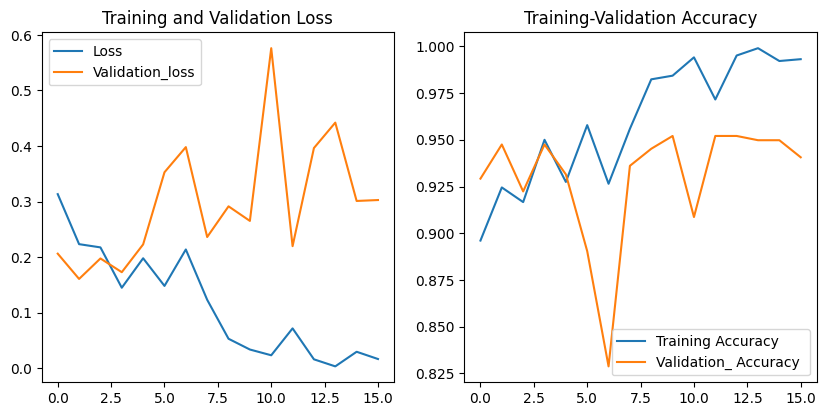

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")


In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 2s 128ms/step


In [ ]:
print(classification_report(y_test_new, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.93      0.94      0.93       129
           2       0.94      0.92      0.93       128

    accuracy                           0.94       365
   macro avg       0.94      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,103,1,4
normal,4,121,4
virus,2,8,118


In [ ]:
def test_single_image(model, img_path):
    """
    Load and classify a single X-ray image using the trained model.

    Parameters:
    - model: Trained Keras model
    - img_path: Path to the image file

    Returns:
    - None
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)
    class_names = ["Covid", "Normal", "Virus"]
    predicted_class = class_names[np.argmax(predictions)]

    # Display the image and prediction
    display(HTML(f"<h3>Predicted Class: {predicted_class}</h3>"))
    display(img)

# Add an upload button
upload_button = widgets.FileUpload()
display(upload_button)

def on_upload_change(change):
    # Handle the file upload event
    if upload_button.value:
        img_path = list(upload_button.value.keys())[0]
        test_single_image(model, img_path)

upload_button.observe(on_upload_change, names='_counter')

In [ ]:
test_single_image(model, X_test, y_test)


TypeError: test_single_image() takes 2 positional arguments but 3 were given